In [71]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob

In [72]:
PROTON_MASS = 1.0073  # Mass of a proton in unified atomic mass units, or Da. For calculating the monoisotopic mass.

In [74]:
df_list = []
for feature_id in range(1,2718+1):
    df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-before-deconvolution.csv'.format(feature_id))
    df_list.append(df)
ms2_df = pd.concat(df_list)

In [75]:
ms2_df.head()

,mz,intensity
0,1075.500342,60730.0
1,946.458172,62844.0
2,1076.502522,36013.0
3,875.421389,39861.0
4,645.368214,33835.0


In [43]:
def peak_within_mass_defect_window(decharged_mass):
    nom_mass = round(decharged_mass) # closest nominal mass
    mass_centre = nom_mass * 1.00048
    width = 0.19 + (0.0001 * nom_mass)
    lower_mass = mass_centre - (width / 2)
    upper_mass = mass_centre + (width / 2)
    return ((decharged_mass >= lower_mass) and (decharged_mass <= upper_mass))

In [44]:
peak_within_mass_defect_window(287.1763)

True

In [78]:
peaks_within_window = 0
total_peaks = len(ms2_df)
for idx,peak_df in ms2_df.iterrows():
    if peak_within_mass_defect_window(peak_df.mz):
        peaks_within_window += 1
print("{}% of the peaks detected are within a mass defect window".format(round(peaks_within_window/total_peaks*100,1)))

70.5% of the peaks detected are within a mass defect window


In [79]:
ms2_df['rounded_mz'] = round(ms2_df.mz,2)

In [83]:
subset_df = ms2_df[(ms2_df.rounded_mz >= 1500) & (ms2_df.rounded_mz <= 1503)]

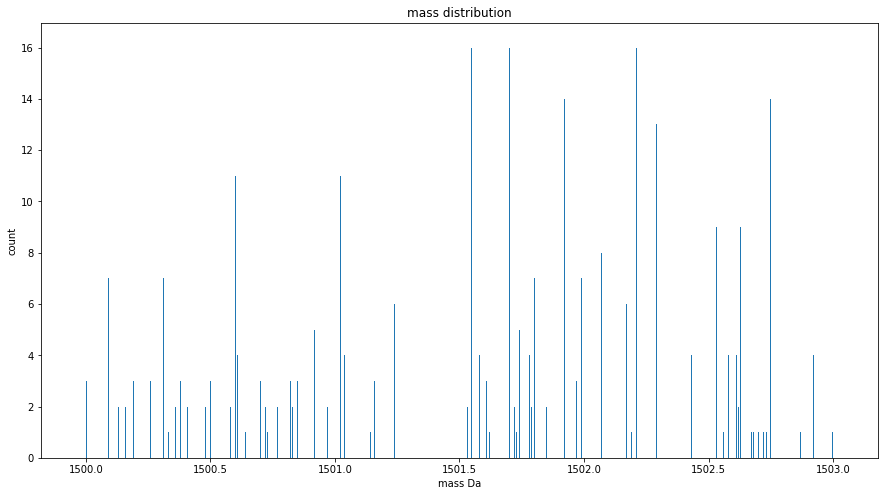

In [85]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('mass distribution')

bins = 1000
hist, bins, _ = plt.hist(subset_df.rounded_mz, bins=bins)
# plt.legend(loc='best')
# plt.xlim([1527.0,1530.0])
plt.xlabel('mass Da')
plt.ylabel('count')

plt.show()